In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [2]:
TRAIN_DATA = 'train.csv'
TEST_DATA = 'test.csv'

# Data Preprocessing

In [3]:
train_df = pd.read_csv(TRAIN_DATA)
test_df = pd.read_csv(TEST_DATA)

In [4]:
display(train_df.head())
print('shape: ', train_df.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


shape:  (891, 12)


In [5]:
display(test_df.head())
print('shape: ', test_df.shape)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


shape:  (418, 11)


In [6]:
# check missing values: train_df
display(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# check missing values: test_df
display(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
def preprocess(train_df, test_df):
    # drop features
    train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, axis=1)
    test_df.drop(['Name', 'Ticket', 'Cabin'], inplace=True, axis=1)
    
    # save 'PassengerId' of test_df for later use
    test_ids = test_df.pop('PassengerId')
    
    # impute 'Age' feature
    train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
    test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
    
    # impute 'Embarked' feature
    train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
    
    # impute 'Fare' feature
    test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)
    
    
    # one-hot-encode nominal data
    nominal_train_ = train_df.select_dtypes(include=[object])
    nominal_test_ = test_df.select_dtypes(include=[object])
    
    encoder1 = preprocessing.LabelEncoder()
    encoder2 = preprocessing.LabelEncoder()
    
    nominal_train = nominal_train_.apply(encoder1.fit_transform)
    nominal_test = nominal_test_.apply(encoder2.fit_transform)
    
    for i in nominal_train.columns:
        train_df[i] = nominal_train[i]
    
    for i in nominal_test.columns:
        test_df[i] = nominal_test[i]
    
    
    # get target feature from train_df
    target = pd.DataFrame(train_df.pop('Survived'), columns=['Survived'])
    
    # shuffle training data
    train_df, target = shuffle(train_df, target, random_state=7)
    
    return train_df.values, target.values.reshape(891,), test_df.values, test_ids

In [9]:
x_train, y_train, x_test, test_ids = preprocess(train_df, test_df)

In [10]:
# check output
display(train_df.head())
print(x_train.shape)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


(891, 7)


In [11]:
print(y_train[:10])
print('\n',y_train.shape)

[0 0 0 0 1 0 0 0 0 1]

 (891,)


In [12]:
print(x_test[:10])
print('\n', x_test.shape)

[[ 3.      1.     34.5     0.      0.      7.8292  1.    ]
 [ 3.      0.     47.      1.      0.      7.      2.    ]
 [ 2.      1.     62.      0.      0.      9.6875  1.    ]
 [ 3.      1.     27.      0.      0.      8.6625  2.    ]
 [ 3.      0.     22.      1.      1.     12.2875  2.    ]
 [ 3.      1.     14.      0.      0.      9.225   2.    ]
 [ 3.      0.     30.      0.      0.      7.6292  1.    ]
 [ 2.      1.     26.      1.      1.     29.      2.    ]
 [ 3.      0.     18.      0.      0.      7.2292  0.    ]
 [ 3.      1.     21.      2.      0.     24.15    2.    ]]

 (418, 7)


# Classifier

In [13]:
# create manual logistic regression classifier

class LRC(object):
    
    def __init__(self, learning_rate=0.05, n_iter=100, random_state=7):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state
        
        
    def fit(self, X, y):
        # initialize weights randomly
        rgen = np.random.RandomState(self.random_state)
        
        self.weights = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1] + 1)
        
        self.cost = []
        
        for i in range(self.n_iter):
            logit = self.logit(X)
            
            y_pred = self.sigmoid_function(logit)
            
            errors = (y - y_pred[:])
            
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            
            cost = (-y.dot(np.log(y_pred)) - ((1 - y).dot(np.log(1 - y_pred + 0.000000001))))

            self.cost.append(cost)
    
    
    def logit(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    
    def sigmoid_function(self, z):
        return (1. / (1. + np.exp(-np.clip(z, -250, 250))) )
    
    
    def predict(self, X):
        return np.where(self.sigmoid_function(self.logit(X)) >= 0.5, 1, 0)

In [14]:
model = LRC(learning_rate=0.05, n_iter=100, random_state=7)

In [15]:
model.fit(x_train, y_train)

In [16]:
y_pred = model.predict(x_test)

y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [17]:
# use scikit learn logister regression model
model_2 = LogisticRegression(random_state=7, solver='lbfgs')

model_2.fit(x_train, y_train)

y_pred2 = model_2.predict(x_test)

y_pred2

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [18]:
def save_preds(_fn, _y_pred, _df):
    import csv
    with open(_fn, 'w') as fout:
        writer = csv.writer(fout, delimiter=',', lineterminator='\n')
        writer.writerow(['Survived', 'PassengerId'])
        for y, passengerId in zip(_y_pred, _df['PassengerId']):
            writer.writerow([y, passengerId])

In [19]:
# add 'PassengerId' back to test_df
test_df['PassengerId'] = test_ids

In [20]:
save_preds('predictions_erhan2.csv', y_pred, test_df)

# Results

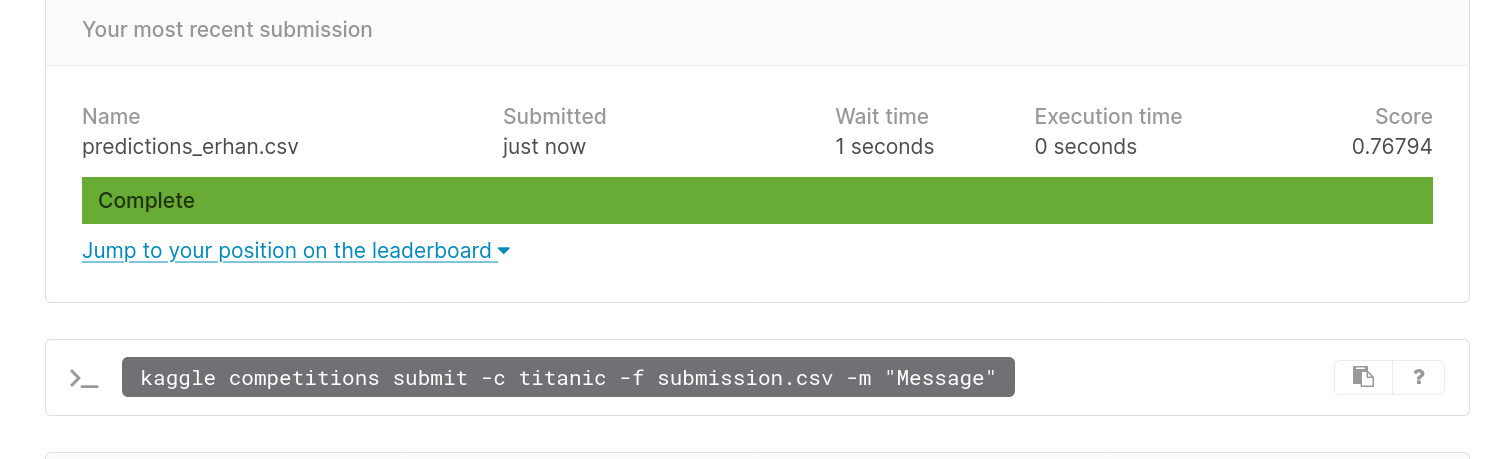

In [21]:
from IPython.display import Image
Image("score.png")

For my manual model the results have some type of unknown error, since all predicted classses are survived. This results in 38% accuracy

As for the sklearn model, I got a 77% accuracy score